In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [62]:
Columns = ['Age','Work','Fnlwgt','Education','Education-num','Marital-Status','Occupation','Relationship','Race','Gender','Capita-gain','Capital-loss','Hours/week','Native-Country','Income']

Adult_train = pd.read_csv('adult.data', sep=",\s", header=None, names = Columns, engine = 'python')
Adult_test = pd.read_csv('adult.test', sep=",\s", header=None, names = Columns, engine = 'python')


# 1)Data Analysis

## 1.1) Data

In [63]:
Adult_train.head()

,Age,Work,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Gender,Capita-gain,Capital-loss,Hours/week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
Adult_test.head()

,Age,Work,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Gender,Capita-gain,Capital-loss,Hours/week,Native-Country,Income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [65]:
Adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work            32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capita-gain     32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours/week      32561 non-null  int64 
 13  Native-Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [66]:
Adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16282 non-null  object 
 1   Work            16281 non-null  object 
 2   Fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education-num   16281 non-null  float64
 5   Marital-Status  16281 non-null  object 
 6   Occupation      16281 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Gender          16281 non-null  object 
 10  Capita-gain     16281 non-null  float64
 11  Capital-loss    16281 non-null  float64
 12  Hours/week      16281 non-null  float64
 13  Native-Country  16281 non-null  object 
 14  Income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [67]:
#converting the age data type from object to int
Adult_test['Age']= pd.to_numeric(Adult_test['Age'],errors='coerce')
Adult_test = Adult_test.drop(0)
Adult_test['Age'] = Adult_test['Age'].astype(int)



##  1.2)Summery of the data sets

In [68]:
Adult_train.describe()

,Age,Fnlwgt,Education-num,Capita-gain,Capital-loss,Hours/week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [69]:
Adult_test.describe()

,Age,Fnlwgt,Education-num,Capita-gain,Capital-loss,Hours/week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


## 1.3) Data cleaning

In [70]:
#replacing the dot in income colunm in test dataset
Adult_test['Income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')
Adult_test.head()   

,Age,Work,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Gender,Capita-gain,Capital-loss,Hours/week,Native-Country,Income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [71]:
for column, missing_count in zip(Adult_train.columns, (Adult_train.values.astype(str) == '?').sum(axis=0)):
    if missing_count > 0:
        print(f"{column}: {missing_count} records")

Work: 1836 records
Occupation: 1843 records
Native-Country: 583 records


In [72]:
for column, missing_count in zip(Adult_test.columns, (Adult_test.values.astype(str) == '?').sum(axis=0)):
    if missing_count > 0:
        print(f"{column}: {missing_count} records")

Work: 963 records
Occupation: 966 records
Native-Country: 274 records


In [73]:
Adult_train = Adult_train[Adult_train.apply(lambda x: '?' not in x.values, axis=1)]
Adult_test = Adult_test[Adult_test.apply(lambda x: '?' not in x.values, axis=1)]


## 1.4) Correlation Metrics

In [74]:


# getting the numaric columns to calculate the correlation metrics
numeric_columns = Adult_train.select_dtypes(include='number').columns
correlation_matrix = Adult_train[numeric_columns].corr()
display(correlation_matrix)

,Age,Fnlwgt,Education-num,Capita-gain,Capital-loss,Hours/week
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
Fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
Education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
Capita-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
Capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
Hours/week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


In [75]:
# getting the numaric columns to calculate the correlation metrics

numeric_columns = Adult_test.select_dtypes(include='number').columns
correlation_matrix = Adult_test[numeric_columns].corr()
display(correlation_matrix)

,Age,Fnlwgt,Education-num,Capita-gain,Capital-loss,Hours/week
Age,1.000000,-0.074375,0.026123,0.078760,0.057745,0.102758
Fnlwgt,-0.074375,1.000000,-0.036010,-0.012839,0.006421,-0.010306
Education-num,0.026123,-0.036010,1.000000,0.131750,0.085817,0.133691
Capita-gain,0.078760,-0.012839,0.131750,1.000000,-0.031876,0.090501
Capital-loss,0.057745,0.006421,0.085817,-0.031876,1.000000,0.057712
Hours/week,0.102758,-0.010306,0.133691,0.090501,0.057712,1.000000


# Analysis of data

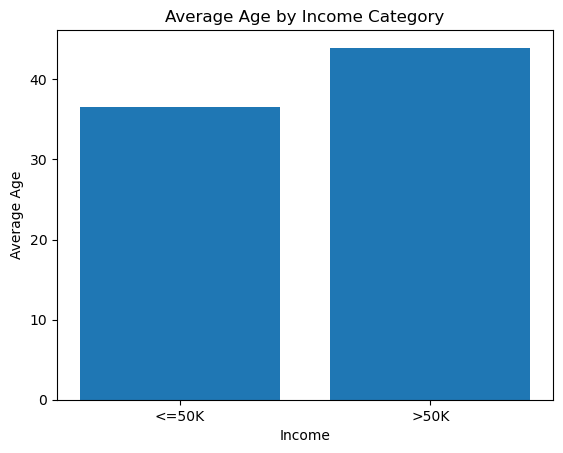

In [76]:
# Filter the 'Income' column to include only unique values
income_categories = Adult_train['Income'].unique()

# Calculate the average age for each income category
avg_age_by_income = Adult_train.groupby('Income')['Age'].mean()

# Plotting
plt.bar(avg_age_by_income.index, avg_age_by_income.values)
plt.xlabel('Income')
plt.ylabel('Average Age')
plt.title('Average Age by Income Category')
plt.show()

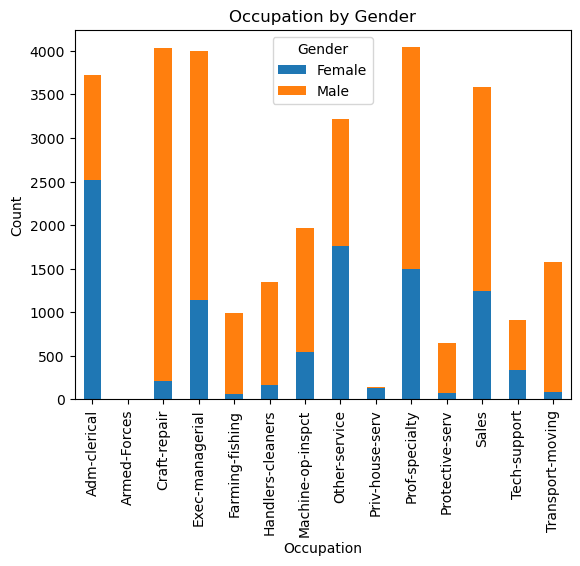

In [77]:
occupation_gender_counts = Adult_train.groupby(['Occupation', 'Gender']).size().unstack()

# Plotting
occupation_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Gender')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

Text(0, 0.5, 'No of Adults')

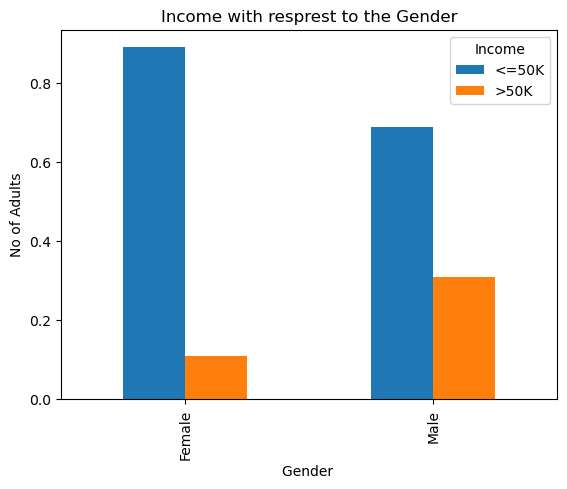

In [78]:
gender = round(pd.crosstab(Adult_train.Gender, Adult_train.Income).div(pd.crosstab(Adult_train.Gender, Adult_train.Income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Income with resprest to the Gender')
ax.set_xlabel('Gender ')
ax.set_ylabel('No of Adults')

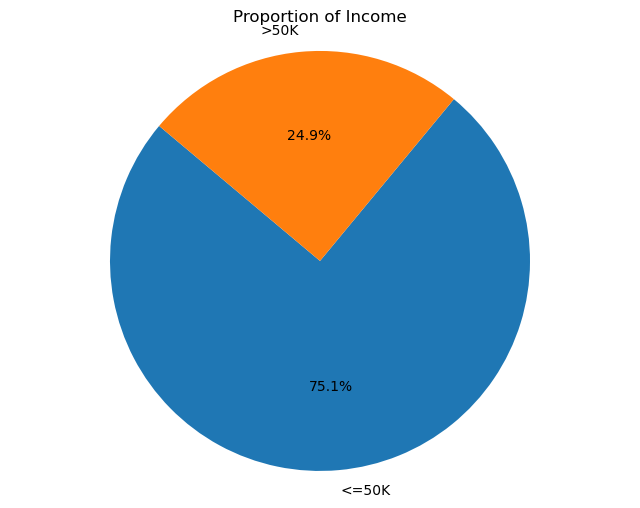

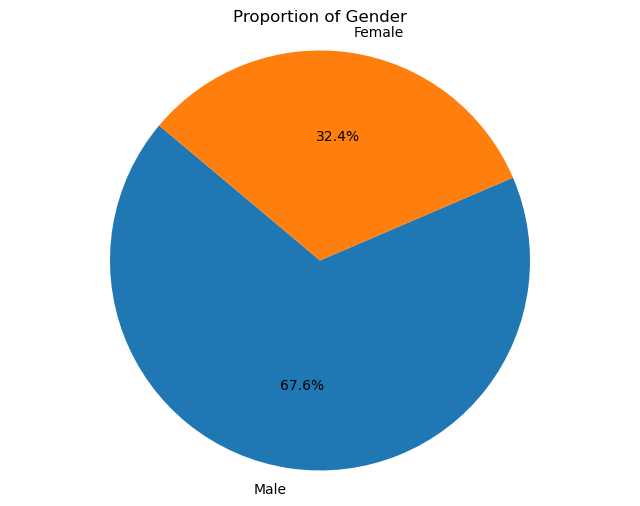

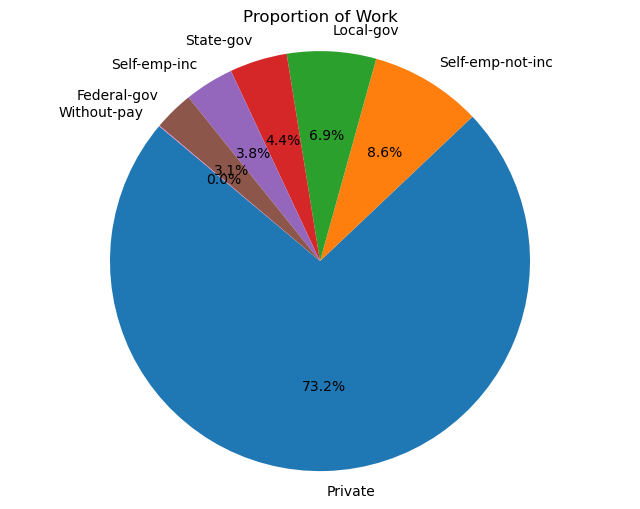

In [79]:
# Function to create pie chart
def create_pie_chart(data, column):
    # Calculate counts for each category
    category_counts = data[column].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Create pie chart for 'Income'
create_pie_chart(Adult_train, 'Income')

# Create pie chart for 'Gender'
create_pie_chart(Adult_train, 'Gender')

create_pie_chart(Adult_test,'Work')

# Encording Data 


In [80]:
# Replacing '>50k' with 1 and '<=50k' with 0 
Adult_test['Income'] = Adult_test['Income'].replace({'>50K': 1, '<=50K': 0})

Adult_train['Income'] = Adult_train['Income'].replace({'>50K': 1, '<=50K': 0})


In [81]:
numeric_columns = Adult_train.select_dtypes(include='number').columns
correlation_matrix = Adult_train[numeric_columns].corr()
display(correlation_matrix)

,Age,Fnlwgt,Education-num,Capita-gain,Capital-loss,Hours/week,Income
Age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.241998
Fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
Education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
Capita-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
Capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
Hours/week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
Income,0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


In [82]:
numeric_columns = Adult_test.select_dtypes(include='number').columns
correlation_matrix = Adult_test[numeric_columns].corr()
display(correlation_matrix)

,Age,Fnlwgt,Education-num,Capita-gain,Capital-loss,Hours/week,Income
Age,1.000000,-0.074375,0.026123,0.078760,0.057745,0.102758,0.227469
Fnlwgt,-0.074375,1.000000,-0.036010,-0.012839,0.006421,-0.010306,-0.003865
Education-num,0.026123,-0.036010,1.000000,0.131750,0.085817,0.133691,0.327813
Capita-gain,0.078760,-0.012839,0.131750,1.000000,-0.031876,0.090501,0.220882
Capital-loss,0.057745,0.006421,0.085817,-0.031876,1.000000,0.057712,0.145967
Hours/week,0.102758,-0.010306,0.133691,0.090501,0.057712,1.000000,0.222665
Income,0.227469,-0.003865,0.327813,0.220882,0.145967,0.222665,1.000000


In [83]:
#droped Fnlwgt becourse its correlation is negative and Education-num is same as Education
Adult_train.drop(columns=['Fnlwgt','Education-num'],inplace= True)
Adult_test.drop(columns=['Fnlwgt','Education-num'],inplace= True)

## Data Preparation

In [84]:
Adult = pd.concat([Adult_test,Adult_train])
Adult.reset_index(inplace = True, drop = True)
Adult_x = Adult.drop(columns = ['Income'])
Adult_y = Adult.Income
adult_cat = pd.get_dummies(Adult_x.select_dtypes('object'))
adult_non_cat = Adult_x.select_dtypes(exclude = 'object')
adult_train_1hot = pd.concat([adult_cat,adult_non_cat], axis=1, join='inner')
adult_train_1hot

,Work_Federal-gov,Work_Local-gov,Work_Private,Work_Self-emp-inc,Work_Self-emp-not-inc,Work_State-gov,Work_Without-pay,Education_10th,Education_11th,Education_12th,...,Native-Country_Taiwan,Native-Country_Thailand,Native-Country_Trinadad&Tobago,Native-Country_United-States,Native-Country_Vietnam,Native-Country_Yugoslavia,Age,Capita-gain,Capital-loss,Hours/week
0,False,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,25,0.0,0.0,40.0
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,38,0.0,0.0,50.0
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,28,0.0,0.0,40.0
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,44,7688.0,0.0,40.0
4,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,34,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,27,0.0,0.0,38.0
45218,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,40,0.0,0.0,40.0
45219,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,58,0.0,0.0,40.0
45220,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,22,0.0,0.0,20.0


In [85]:
Adult_train,Adult_test ,Adult_train_y,Adult_test_y = train_test_split(adult_train_1hot,Adult_y, test_size  = 0.25)

In [86]:
#normalization
scaler = StandardScaler()
scaler.fit(Adult_train)
Adult_train = scaler.transform(Adult_train)
Adult_test  = scaler.transform(Adult_test)


# Random Forrest


In [87]:
over_sampling= SMOTE()
Adult_train_resample,Adult_train_y_resample =over_sampling.fit_resample(Adult_train,Adult_train_y)

In [88]:
Random_f = RandomForestClassifier(n_estimators=100,criterion='gini',max_features=None,min_samples_split=0.05,min_samples_leaf=0.001)
Random_f.fit(Adult_train,Adult_train_y)
Random_f_predic = Random_f.predict(Adult_test)
Random_f_eval = accuracy_score(Adult_test_y,Random_f_predic)
print("Test Accuracy:", Random_f_eval)
print("Random Forest classification report")
print(classification_report(Adult_test_y,Random_f_predic))

Test Accuracy: 0.843888200955245
Random Forest classification report
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      8458
           1       0.71      0.64      0.67      2848

    accuracy                           0.84     11306
   macro avg       0.80      0.78      0.79     11306
weighted avg       0.84      0.84      0.84     11306



## Naive Bayes

In [89]:
Naive_bayes = GaussianNB()
Naive_bayes.fit(Adult_train,Adult_train_y)
Naive_bayes_predic = Naive_bayes.predict(Adult_test)
Naive_bayes_eval = accuracy_score(Adult_test_y,Naive_bayes_predic)
print("Test Accuracy:", Naive_bayes_eval)
print("Naive Bayes classification report")
print(classification_report(Adult_test_y,Naive_bayes_predic))

Test Accuracy: 0.5895984433044401
Naive Bayes classification report
              precision    recall  f1-score   support

           0       0.96      0.47      0.63      8458
           1       0.37      0.94      0.53      2848

    accuracy                           0.59     11306
   macro avg       0.67      0.70      0.58     11306
weighted avg       0.81      0.59      0.61     11306

